# Pymaceuticals Inc.
---

### Analysis

 Write at least three observations or inferences that can be made from the data. Include these observations at the top of your notebook: 
 Since all the regimines appear to have a similar sample size, it is reasonable to compare the different regimines in the following ststements:
 
1) When looking at the effects the drug Capomulin, this one seems to be just about as effective as Ramicane, while the drugs Infubinol and Ceftamin fall a bit behind. I use "effective" to describe the effects the drug has on the tumor size over time. 
2) When looking at individual mice's tumor sized when taking Capomulin, it is easy to visually see the tumor decrease in size at each dtatapoint.
3) There is a strong correlation between a mouse's weight and the size of it's tumor. The heavier the mouse, the larger a tumor it is likely to have. The lighter a mouse is, the smaller a tumor it will tend to have. 
4) For every increase in weight by 1 gram, the volume of the tumor will increase by 0.95 cubic millimeters
 

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [113]:
# Checking the number of mice.
mouse_count = len(data_complete["Mouse ID"].unique())
mouse_count

249

In [114]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
doubles=data_complete.duplicated(subset=['Mouse ID'], keep=False)
doubles.head()

0     True
1    False
2     True
3     True
4     True
dtype: bool

In [115]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = data_complete[data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [116]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_mice = data_complete.loc[~data_complete['Mouse ID'].str.contains('g989')]
dropped_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [117]:
# Checking the number of mice in the clean DataFrame.
dropped_count = len(dropped_mice["Mouse ID"].unique())
dropped_count

248

## Summary Statistics

In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = dropped_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = dropped_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = dropped_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdev = dropped_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = dropped_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
mice_summary = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": stdev,
    "Tumor Volume Std. Err.": sem
})

mice_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [119]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_functions = {"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']}

# Perform aggregation grouped by 'Drug Regimen'
mice_summary = dropped_mice.groupby("Drug Regimen").agg(agg_functions)

# Rename columns for clarity
mice_summary.columns = [
    "Mean Tumor Volume",
    "Median Tumor Volume",
    "Tumor Volume Variance",
    "Tumor Volume Std. Dev.",
    "Tumor Volume Std. Err."
]

mice_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Frequency of Drugs in Drug Regimen')

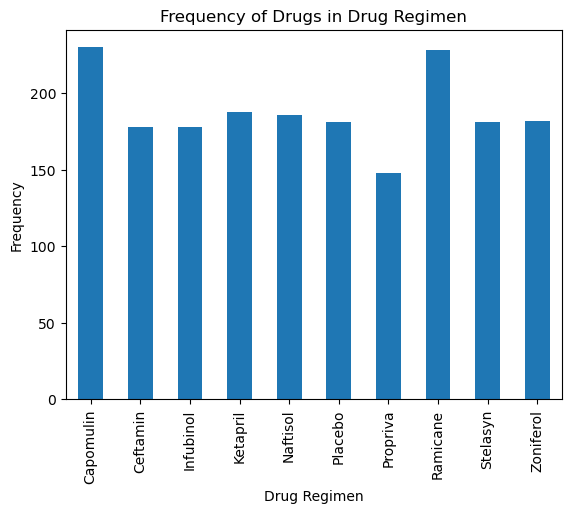

In [120]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
grouped_data = dropped_mice.groupby('Drug Regimen').size()

# Plot the bar chart using pandas plotting
grouped_data.plot(kind='bar', rot=90)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Frequency')
plt.title('Frequency of Drugs in Drug Regimen')

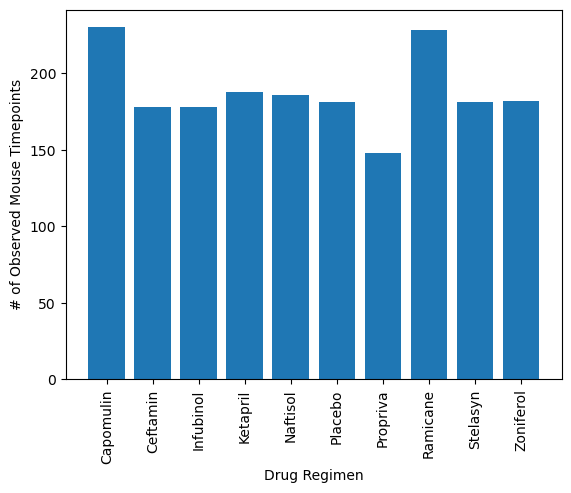

In [121]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
grouped_data = dropped_mice.groupby('Drug Regimen').size()
x_axis = grouped_data.index
y_axis = grouped_data.values

# Plot the bar chart
plt.bar(x_axis, y_axis)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)

plt.show()

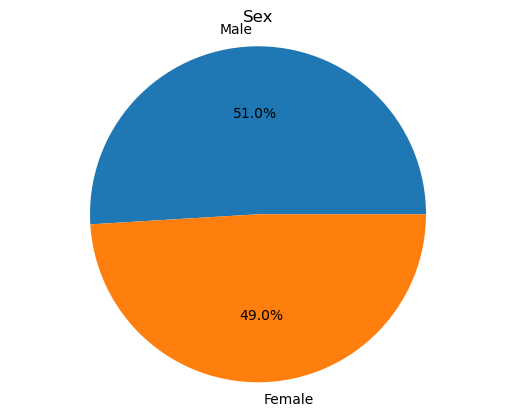

In [122]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of male and female mice
mice_counts = dropped_mice["Sex"].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_counts.plot(kind='pie', autopct='%1.1f%%', title='Sex')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.ylabel('')  # Remove y-axis label
plt.show()

Text(0.0, 1.0, 'Sex')

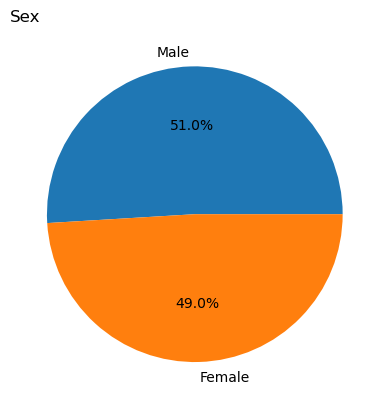

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_mice = dropped_mice["Sex"].value_counts()["Male"]
female_mice = dropped_mice["Sex"].value_counts()["Female"]
gender=["Male","Female"]
Count=[male_mice,female_mice]
plt.pie(Count, labels=gender,autopct="%1.1f%%")
plt.title("Sex",loc='left')

## Quartiles, Outliers and Boxplots

In [124]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

Fin_Tum_Vol=dropped_mice.groupby("Mouse ID")["Timepoint"].max()
Drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume_filtered = dropped_mice[dropped_mice["Drug Regimen"].isin(Drugs)]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
dropped_mice_plus_FinalTumor = pd.merge(final_tumor_volume_filtered,dropped_mice, on=["Mouse ID", "Timepoint"], how="inner")


dropped_mice_plus_FinalTumor

,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Tumor Volume (mm3)_y,Metastatic Sites_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45.000000,0,Capomulin,Female,9,22
1,c326,0,45.000000,0,Infubinol,Female,18,25,45.000000,0,Infubinol,Female,18,25
2,c139,0,45.000000,0,Infubinol,Male,11,28,45.000000,0,Infubinol,Male,11,28
3,v339,0,45.000000,0,Infubinol,Male,20,26,45.000000,0,Infubinol,Male,20,26
4,a577,0,45.000000,0,Infubinol,Female,6,25,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,a644,45,32.978522,1,Ramicane,Female,7,17,32.978522,1,Ramicane,Female,7,17
810,i177,45,33.562402,3,Ramicane,Male,10,18,33.562402,3,Ramicane,Male,10,18
811,r944,45,41.581521,2,Capomulin,Male,12,25,41.581521,2,Capomulin,Male,12,25
812,u364,45,31.023923,3,Capomulin,Male,18,17,31.023923,3,Capomulin,Male,18,17


In [125]:
###
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty lists to fill with tumor vol data (for plotting)
tumor_volume_data = {treatment: [] for treatment in treatments}


for treatment in treatments:
    # Calculate the IQR for each regimen
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = dropped_mice_plus_FinalTumor.loc[dropped_mice_plus_FinalTumor["Drug Regimen_x"] == treatment, "Tumor Volume (mm3)_x"]
    
    # Add subset
    tumor_volume_data[treatment] = tumor_volumes.sort_values().tolist()


# Determine outliers using upper and lower bounds
    potential_outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    print(f"{treatment}'s potential outliers: {potential_outliers}")

Capomulin's potential outliers: 367    32.623003
379    30.485985
555    32.680655
564    31.758275
624    28.328531
642    30.834357
646    30.206825
681    32.562839
703    25.472143
705    31.378045
730    31.475411
739    31.804841
743    28.167397
767    32.377357
773    31.896238
791    28.430964
793    28.484033
794    23.343598
812    31.023923
Name: Tumor Volume (mm3)_x, dtype: float64
Ramicane's potential outliers: 677    26.546993
691    24.365505
782    22.050126
Name: Tumor Volume (mm3)_x, dtype: float64
Infubinol's potential outliers: 510    61.461970
513    57.534193
542    64.149871
548    59.523197
550    60.969711
558    59.861241
563    59.133640
574    58.268442
575    59.412537
576    59.747077
580    59.240615
598    60.165180
610    57.992797
621    60.541562
626    62.117279
629    58.628399
636    64.925420
645    60.903885
662    60.064340
666    61.931650
670    58.092629
674    61.730196
680    67.821420
712    61.525276
714    63.593490
717    58.315593
726

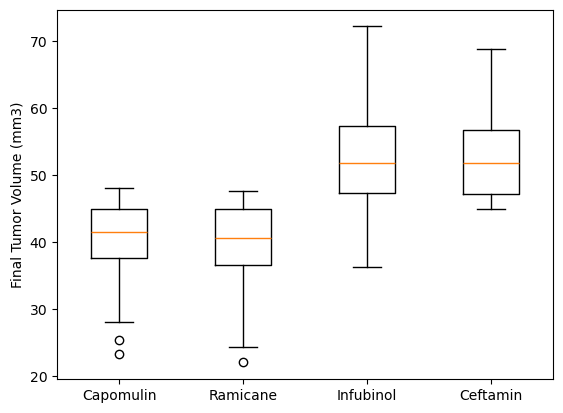

In [126]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [tumor_volume_data[treatment] for treatment in treatments]

# Create a box plot
plt.boxplot(data_to_plot, labels=treatments)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

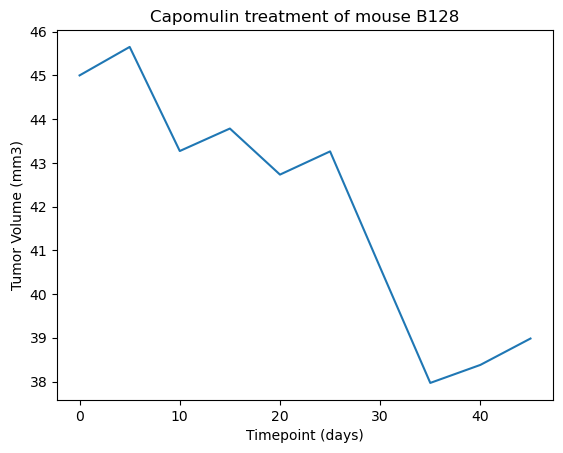

In [127]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
##plt.plot(dropped_mice['Timepoint'],dropped_mice['Tumor Volume (mm3)'])

capomulin_only = dropped_mice[dropped_mice['Drug Regimen'] == 'Capomulin']

lonely_cap_mouse = capomulin_only[capomulin_only['Mouse ID'] == 'b128']

# Generate a line plot of tumor volume vs. time point for the selected mouse
plt.plot(lonely_cap_mouse['Timepoint'], lonely_cap_mouse['Tumor Volume (mm3)'])

# Add labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse B128')

# Show the plot
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

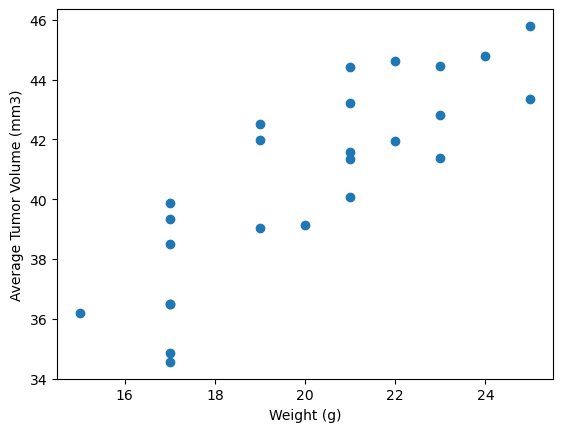

In [128]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_cap_tum_vol=capomulin_only.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
cap_mouse_weight = capomulin_only.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(cap_mouse_weight, average_cap_tum_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

The correlation between mouse and  the average tumor volume is 0.84
For every increase in weight by 1 gram, the volume of the tumor will increase by 0.95 cubic millimeters.


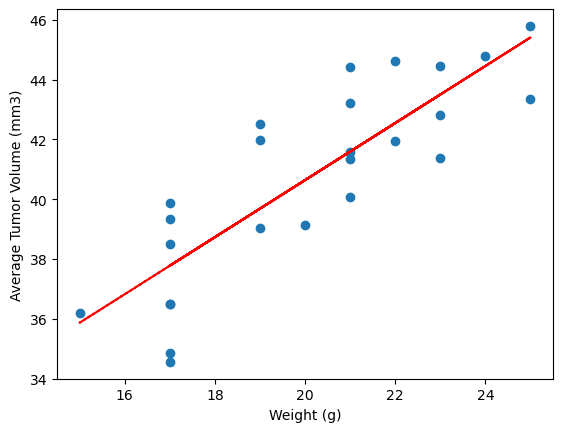

In [129]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation between mouse and  the average tumor volume is {round(st.pearsonr(cap_mouse_weight,average_cap_tum_vol)[0],2)}")
plt.scatter(cap_mouse_weight, average_cap_tum_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#Line o best fit
mouse_slope, mouse_intercept, _, _, _ = st.linregress(cap_mouse_weight, average_cap_tum_vol)
mouse_fit = mouse_slope * cap_mouse_weight + mouse_intercept
plt.plot(cap_mouse_weight, mouse_fit, "--", color='red')

#Stats statement for slope
print(f"For every increase in weight by 1 gram, the volume of the tumor will increase by {mouse_slope:.2f} cubic millimeters.")
